# Decades
This notebook is to plot our cluster data created in the Training-Model Notebook per decade.

## Setup
First, the notebook will setup dependencies and import the data to be used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import library as lib
import seaborn as sns

In [2]:
image_filepath = "../images/plots/decades"

In [3]:
df = lib.import_music_df_with_model()
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1
7,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,0
14,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,2
16,It's Time To Cry,Paul Anka,7,1960,1,4,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,0


In [4]:
# Add Decade Column
df['Decade'] = (10 * (df['Year'] // 10)).astype(str) + 's'
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Decade
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1,1960s
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1,1960s
7,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,0,1960s
14,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,2,1960s
16,It's Time To Cry,Paul Anka,7,1960,1,4,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,0,1960s


In [5]:
from collections import Counter
Counter(df["Cluster"])

Counter({1: 7452, 0: 9458, 2: 3125})

## Plots
After cleaning the data, now the notebook will conduct a series of plots on the data to see what trends there are. For this, the notebook will be looking at the average for each of the musical attributes.

In [6]:
# Group by Decade and find the mean for values.
decade_gb = df.groupby(by=["Decade", "Cluster"])
decade_mean_df = decade_gb.median()
decade_mean_df

Placement  Year  Month  Day  danceability  energy  key  \
Decade Cluster                                                           
1960s  0               38  1965      7   17        0.5930  0.5430  5.0   
       1               45  1965      7   16        0.5160  0.4360  5.0   
       2               42  1964      6   16        0.4335  0.5510  5.0   
1970s  0               42  1975      7   17        0.6170  0.6310  5.0   
       1               41  1974      7   17        0.5830  0.5280  5.0   
       2               44  1973      6   17        0.4420  0.5910  5.0   
1980s  0               38  1984      7   17        0.6615  0.7025  5.0   
       1               31  1984      6   17        0.6300  0.5810  5.0   
       2               33  1984      7   16        0.5220  0.7080  5.0   
1990s  0               42  1994      6   15        0.6570  0.6970  5.0   
       1               43  1995      6   16        0.6970  0.6500  6.0   
       2               44  1994      7   15        0.5520  0.6580  6.0   
2000s  0               44  2005      7   17        0.6350  0.7420  5.0   
       1               38  2004      7   16        0.6695  0.7170  5.5   
       2               50  2006      7   16        0.4990  0.7630  5.0   
2010s  0               50  2014      7   17        0.6740  0.7040  6.0   
       1               51  2015      7   17        0.6530  0.6840  6.0   
       2               54  2015      7   17        0.5560  0.7250  5.0   

                loudness  speechiness  acousticness  liveness  valence  \
Decade Cluster                                                           
1960s  0         -9.8940      0.03800        0.5440    0.1550   0.7640   
       1        -10.6295      0.03260        0.6565    0.1560   0.5920   
       2         -9.7080      0.04235        0.5700    0.1555   0.7610   
1970s  0         -9.9755      0.03910        0.2190    0.1260   0.7410   
       1        -10.6870      0.03580        0.3650    0.1230   0.6580   
       2        -10.3670      0.04530        0.3240    0.1430   0.6940   
1980s  0         -9.6505      0.03735        0.1030    0.1220   0.7320   
       1        -10.2850      0.03430        0.2100    0.1130   0.6200   
       2         -9.6370      0.04330        0.1060    0.1310   0.7080   
1990s  0         -8.1510      0.03660        0.0693    0.1210   0.6120   
       1         -8.2700      0.04760        0.0886    0.1200   0.6090   
       2         -8.2950      0.04440        0.1160    0.1220   0.5780   
2000s  0         -5.4060      0.04200        0.0655    0.1270   0.5450   
       1         -5.5765      0.06195        0.0811    0.1245   0.5920   
       2         -5.1615      0.06000        0.0596    0.1360   0.5345   
2010s  0         -5.4760      0.05465        0.0629    0.1280   0.4805   
       1         -5.7880      0.05610        0.0879    0.1240   0.4820   
       2         -5.4310      0.08255        0.0789    0.1325   0.5075   

                   tempo  
Decade Cluster            
1960s  0        125.0385  
       1         93.8310  
       2        169.4050  
1970s  0        124.9290  
       1         95.8260  
       2        166.4300  
1980s  0        123.6770  
       1         97.0000  
       2        164.5680  
1990s  0        124.6230  
       1         95.0980  
       2        170.9490  
2000s  0        127.6730  
       1         93.9735  
       2        164.1510  
2010s  0        127.9980  
       1         94.0500  
       2        161.9970

In [7]:
# Define data columns
columns = [
    "Placement", 
    "danceability",
    "energy",
    "key",
    "loudness",
    "speechiness",
    "acousticness",
    "liveness",
    "valence",
    "tempo"
]

# Define Legend Labels
legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]

### Bar Charts

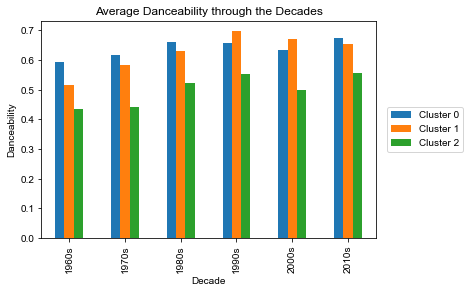

In [8]:
# Create Bar Charts
def decade_bar_chart(df, column, legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]):
    title = f"Average {column.capitalize()} through the Decades"
    axis = df[[column]].unstack('Cluster').plot(kind="bar", title=title)
    axis.set_ylabel(column.capitalize())
    axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
    
decade_bar_chart(decade_mean_df, "danceability", legend_labels)
sns.set_theme()
plt.show()

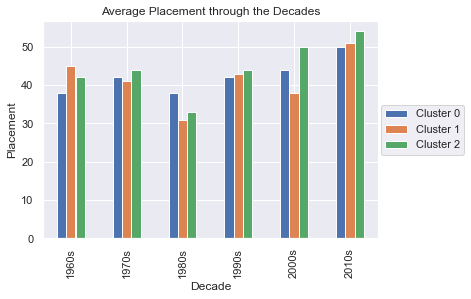

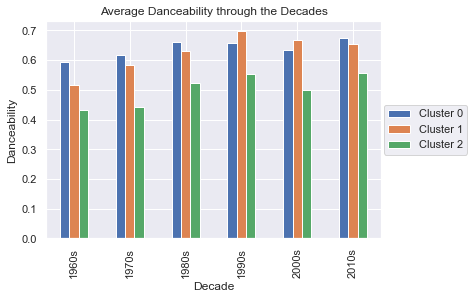

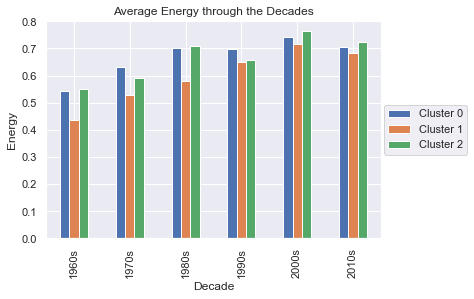

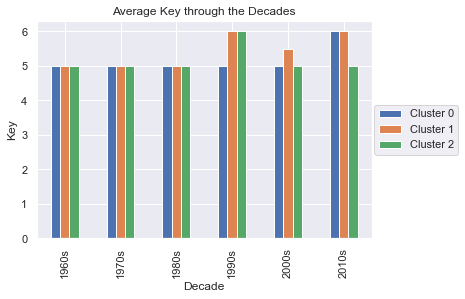

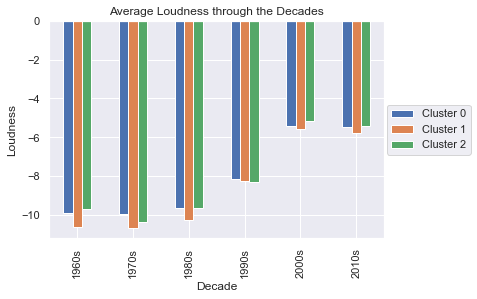

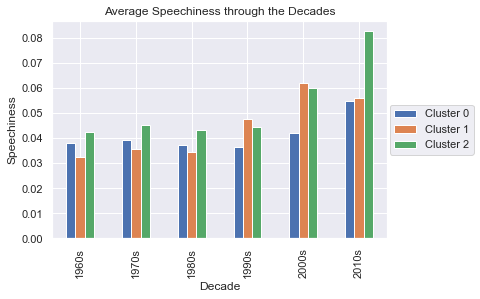

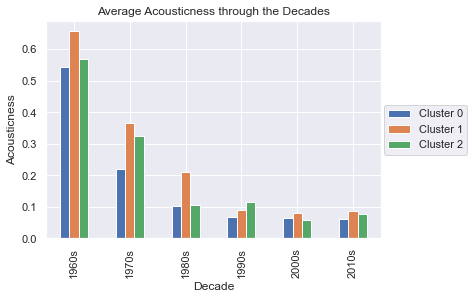

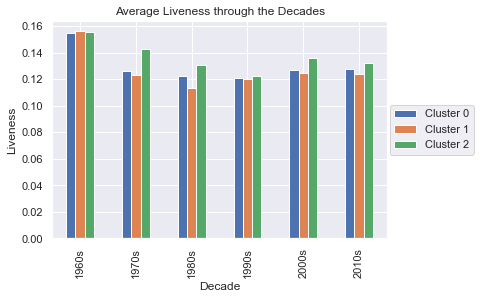

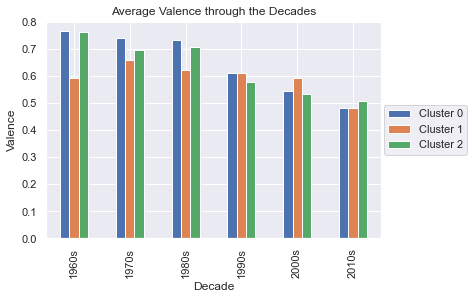

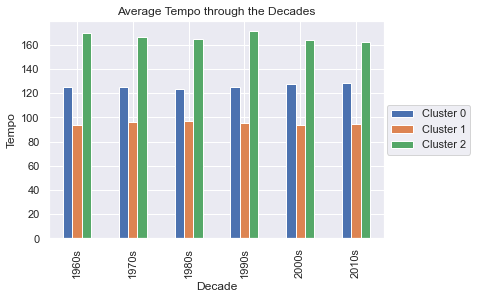

In [9]:
for column in columns:
    decade_bar_chart(decade_mean_df, column, legend_labels)
    plt.savefig(f"{image_filepath}/bar/{column.lower()}.png", bbox_inches='tight')
    sns.set_theme()
    plt.show()

### Line Charts

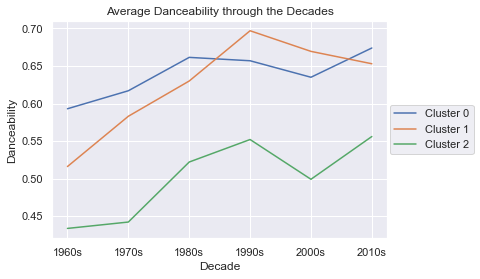

In [10]:
def decade_line_chart(df, column, legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2"]):
    title = f"Average {column.capitalize()} through the Decades"
    data = df
    if(column):
        data = df[[column]]
    axis = data.unstack('Cluster').plot(kind="line", title=title)
    axis.set_ylabel(column.capitalize())
    axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
    
decade_line_chart(decade_mean_df, "danceability", legend_labels)
sns.set_theme()
plt.show()

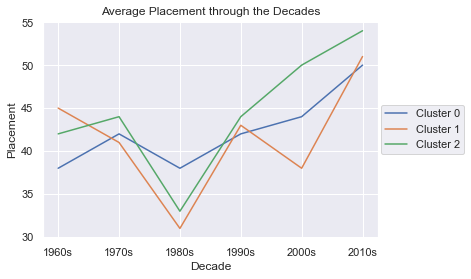

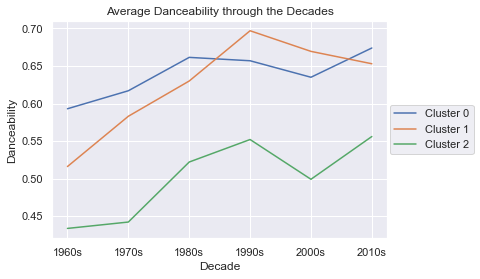

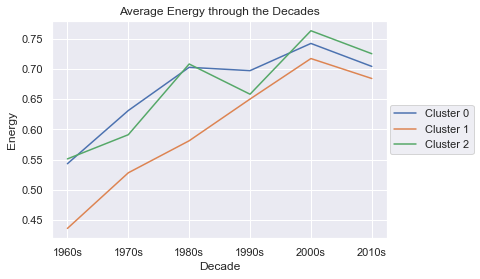

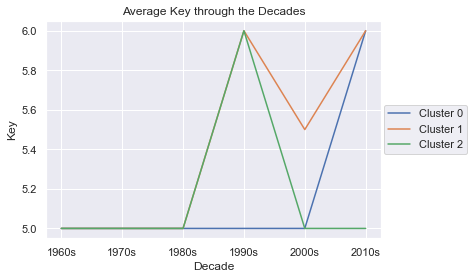

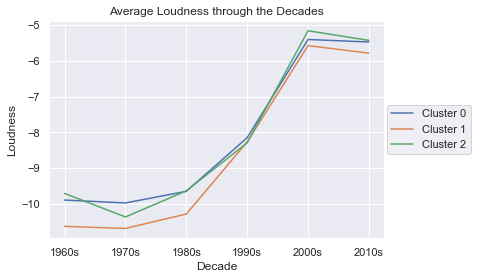

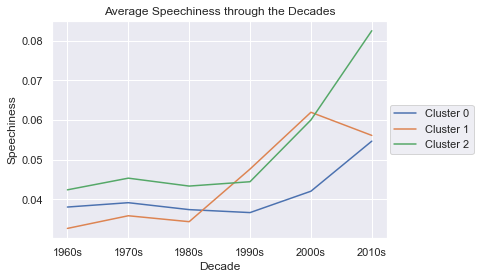

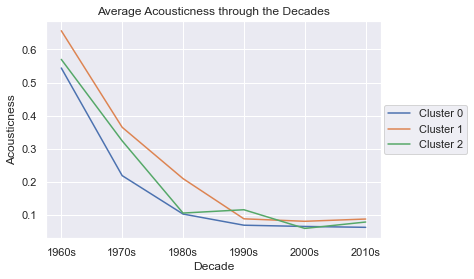

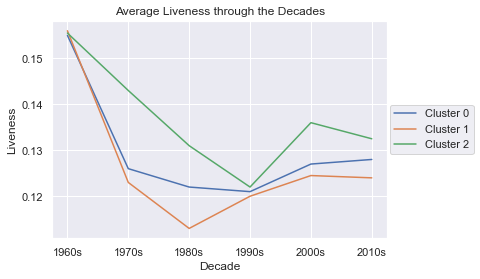

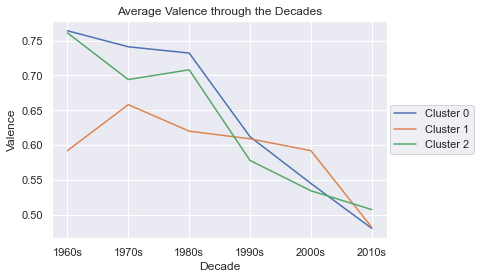

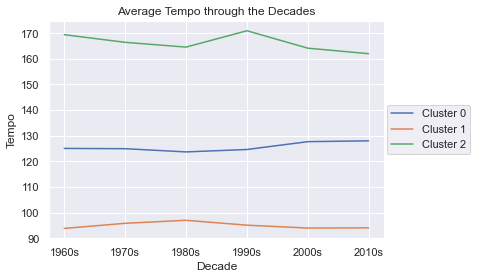

In [11]:
for column in columns:
    decade_line_chart(decade_mean_df, column, legend_labels)
    plt.savefig(f"{image_filepath}/line/{column.lower()}.png", bbox_inches='tight')
    sns.set_theme()
    plt.show()

### Count of Hits
Let's look at the number of hits per cluster per decade.

In [12]:
hits_counts_df = decade_gb.count()
hits_counts_df = hits_counts_df["Track"]

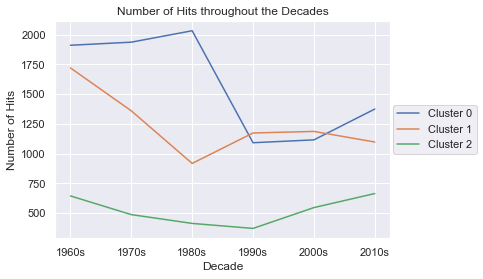

In [13]:
axis = hits_counts_df.unstack('Cluster').plot(kind="line", title = "Number of Hits throughout the Decades")
axis.set_ylabel("Number of Hits")
axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
plt.savefig(f"{image_filepath}/line/number_of_hits.png", bbox_inches='tight')
sns.set_theme()
plt.show()

### Count of Number 1 Hits
One additional aspect to look at is to see how many clusters hit the number 1 position within each decade.

In [14]:
number_one_df = df[df["Placement"] ==1]
number_one_df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Decade
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1,1960s
11,Running Bear,Johnny Preston,1,1960,2,1,0.772,0.297,5.0,-14.679,0.0530,0.854,0.125,0.822,119.987,0,1960s
397,Cathy's Clown,The Everly Brothers,1,1960,5,23,0.498,0.582,7.0,-8.961,0.0339,0.412,0.372,0.866,119.809,0,1960s
514,I'm Sorry,Brenda Lee,1,1960,7,18,0.558,0.223,10.0,-12.362,0.0299,0.868,0.130,0.303,101.711,1,1960s
698,Mr. Custer,Larry Verne,1,1960,10,10,0.697,0.697,4.0,-4.863,0.0537,0.707,0.156,0.582,108.500,1,1960s


In [15]:
number_one_gb = number_one_df.groupby(["Decade", "Cluster"])
number_one_gb.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Decade
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.83500,0.1600,0.691,106.662,1,1960s
11,Running Bear,Johnny Preston,1,1960,2,1,0.772,0.297,5.0,-14.679,0.0530,0.85400,0.1250,0.822,119.987,0,1960s
397,Cathy's Clown,The Everly Brothers,1,1960,5,23,0.498,0.582,7.0,-8.961,0.0339,0.41200,0.3720,0.866,119.809,0,1960s
514,I'm Sorry,Brenda Lee,1,1960,7,18,0.558,0.223,10.0,-12.362,0.0299,0.86800,0.1300,0.303,101.711,1,1960s
698,Mr. Custer,Larry Verne,1,1960,10,10,0.697,0.697,4.0,-4.863,0.0537,0.70700,0.1560,0.582,108.500,1,1960s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59987,We Are Young,fun. Featuring Janelle Monae,1,2012,3,24,0.378,0.638,10.0,-5.576,0.0750,0.02000,0.0849,0.735,184.086,2,2010s
60825,We Are Never Ever Getting Back Together,Taylor Swift,1,2012,9,8,0.628,0.676,7.0,-5.911,0.0916,0.00957,0.1020,0.750,85.984,1,2010s
60653,One More Night,Maroon 5,1,2012,10,6,0.718,0.820,5.0,-3.453,0.0323,0.04440,0.0846,0.613,92.998,1,2010s
62579,Happy,Pharrell Williams,1,2014,3,22,0.647,0.822,5.0,-4.662,0.1830,0.21900,0.0908,0.962,160.019,2,2010s


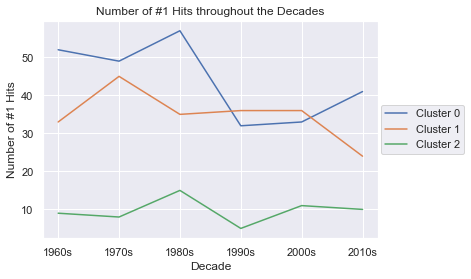

In [16]:
number_one_count_df = number_one_gb["Track"].count()

axis = number_one_count_df.unstack('Cluster').plot(kind="line", title = "Number of #1 Hits throughout the Decades")
axis.set_ylabel("Number of #1 Hits")
axis.legend(legend_labels, loc='center right', bbox_to_anchor=(1.275, .5))
plt.savefig(f"{image_filepath}/line/number_ones.png", bbox_inches='tight')
sns.set_theme()
plt.show()